In [58]:
import json
from pprint import pprint
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [342]:
#read the json

with open('kaggleNatureConservancy/shark_labels.json') as data_file:    
    #data = json.load(data_file)
    fish_loc_labels=json.load(data_file)
    
print len(fish_loc_labels),'labels loaded'

177 labels loaded


In [110]:
def get_im_cv2(path,dims=[100,100]):
    img = cv2.imread(path)
    original_dims=img.shape
    resized = cv2.resize(img, (dims[0], dims[1]), interpolation=cv2.INTER_LINEAR)
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    return resized,original_dims

In [303]:
len(fish_loc_labels)

118

In [308]:
fish_loc_labels[0]['annotations']=[]

In [343]:
import time
import glob
X_train = []
X_train_id = []
y_train = []
start_time = time.time()

samples=len(fish_loc_labels)
dims=[100,100]

fld='SHARK'
X=np.zeros([samples,1,dims[0], dims[1]]) 
y=np.zeros([samples,4])
#index = folders.index(fld)
#print('Load folder {} (Index: {})'.format(fld, index))
path = os.path.join('train', fld, '*.jpg')
print path
#files = glob.glob(path)
for item,i in zip(fish_loc_labels,range(len(fish_loc_labels))):
    if item['annotations']!=[]:
        path = os.path.join('train', fld, item['filename'])
        #load_file(item['filename'])
        flbase = os.path.basename(path)
        img,original_dims = get_im_cv2(path)
        X_train.append(img)
        X_train_id.append(flbase)
        top_left=(int(item['annotations'][0]['x']*dims[0]/original_dims[1]),int(item['annotations'][0]['y']*dims[0]/original_dims[0]))
        bottom_right=(int(item['annotations'][1]['x']*dims[1]/original_dims[1]),int(item['annotations'][1]['y']*dims[1]/original_dims[0]))
        #fish_loc=[item['annotations'][0]['x'],item['annotations'][0]['y'],item['annotations'][1]['x'],item['annotations'][1]['y']]
        y_train.append([top_left,bottom_right])
        #=img
        
        y[i,:]=np.array([top_left[0],top_left[1],bottom_right[0],bottom_right[1]])
        #rint np.array([top_left[0],top_left[1],bottom_right[0],bottom_right[1]]),y[i,:]
        #rint y
        
for i in range(len(X_train)):
    X[i,0,:,:]=X_train[i]
    y[i,:]=np.array([y_train[i][0][0],y_train[i][0][1],y_train[i][1][0],y_train[i][1][1]])

X = X.astype(np.float32)
y = y.astype(np.float32)

X=X/255
y=(y-50)/100

train/SHARK/*.jpg


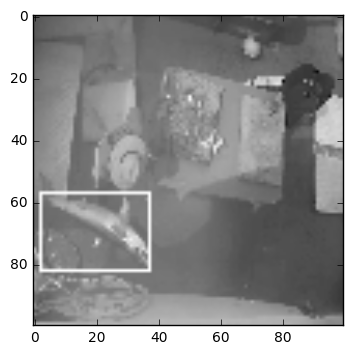

In [349]:
#show me
i=22
cv2.rectangle(X_train[i],y_train[i][0],y_train[i][1] , 255, 1)
#fig, ax = plt.subplots(figsize=(12, 7))
plt.imshow(X_train[i],cmap = 'gray')

In [208]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None,1, 100, 100),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=4, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=1000,
    verbose=1,
    )

#X, y = load2d()  # load 2-d data

net2.fit(X, y)

# Neural Network with 8038476 learnable parameters

## Layer information

  #  name     size
---  -------  ---------
  0  input    1x100x100
  1  conv1    32x98x98
  2  pool1    32x49x49
  3  conv2    64x48x48
  4  pool2    64x24x24
  5  conv3    128x23x23
  6  pool3    128x11x11
  7  hidden4  500
  8  hidden5  500
  9  output   4

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.03717     0.03325    1.11782  2.56s
      2     0.03230     0.03221    1.00258  2.35s
      3     0.03060     0.02936    1.04214  2.35s
      4     0.02837     0.02757    1.02879  2.35s
      5     0.02673     0.02635    1.01458  2.44s
      6     0.02521     0.02502    1.00746  2.36s
      7     0.02382     0.02369    1.00539  2.35s
      8     0.02255     0.02270    0.99346  2.36s
      9     0.02147     0.02187    0.98172  2.35s
     10     0.02055     0.02108    0.97500  2.36s
     11     0.01972     0.02039    0.96732  2.36s
     12     0.0189

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f6bc2908fd0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f6bc2908ed0>,
     check_input=True, conv1_filter_size=(3, 3), conv1_num_filters=32,
     conv2_filter_size=(2, 2), conv2_num_filters=64,
     conv3_filter_size=(2, 2), conv3_num_filters=128, custom_scores=None,
     hidden4_num_units=500, hidden5_num_units=500,
     input_shape=(None, 1, 100, 100),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool1', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool2', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv3', <class..., <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=1000, more_params={},
     objective=<function objective at 0x7f6bc29

[(37, 82), (2, 57)] [ 71.71633911  57.59139252  75.36396027  64.03665924]


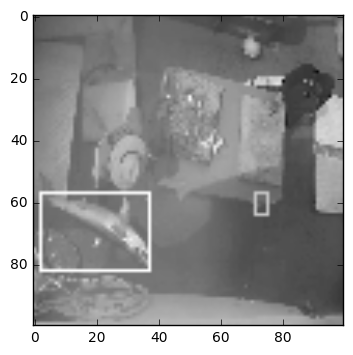

In [358]:
#show me
i=22
cv2.rectangle(X_train[i],y_train[i][0],y_train[i][1] , 255, 1)
cv2.rectangle(X_train[i],(y_pred_scaled[i,0],y_pred_scaled[i,1]),(y_pred_scaled[i,2],y_pred_scaled[i,3]) , 200, 1)
#fig, ax = plt.subplots(figsize=(12, 7))
plt.imshow(X_train[i],cmap = 'gray')
print y_train[i],y_pred_scaled[i,:]

In [350]:
y_pred=net2.predict(X)

In [351]:
y_pred_scaled=y_pred*100+50
y_scaled=y*100+50

In [355]:
y_pred_scaled[y_pred_scaled<0]=0
y_pred_scaled[y_pred_scaled>100]=100

In [356]:
np.sqrt(np.sum((y_pred_scaled-y_scaled)**2)/(len(fish_loc_labels)*4))

18.892896513379156